# Naive Bayes Classifier Example

Use Titanic data from `seaborn`

In [17]:
import seaborn as sns

titanic_data = sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
# Preprocessing
titanic_data = titanic_data.dropna()

X = titanic_data.drop("survived", axis=1)
y = titanic_data["survived"].astype("category")

# Numeric columns for scaling, features are age and fare
numeric_columns = ['age', 'fare']
# X
numeric_data = titanic_data[numeric_columns]
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [19]:
from sklearn.model_selection import train_test_split

# Age and Fare as features
X_b = numeric_data.values
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_accuracy = nb_model.score(X_test, y_test)
print("Naive Bayes accuracy:", nb_accuracy, f"({nb_accuracy*100:.2f}%)")

Naive Bayes accuracy: 0.7297297297297297 (72.97%)


In [23]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.73      0.92      0.81        24

    accuracy                           0.73        37
   macro avg       0.72      0.65      0.66        37
weighted avg       0.73      0.73      0.70        37



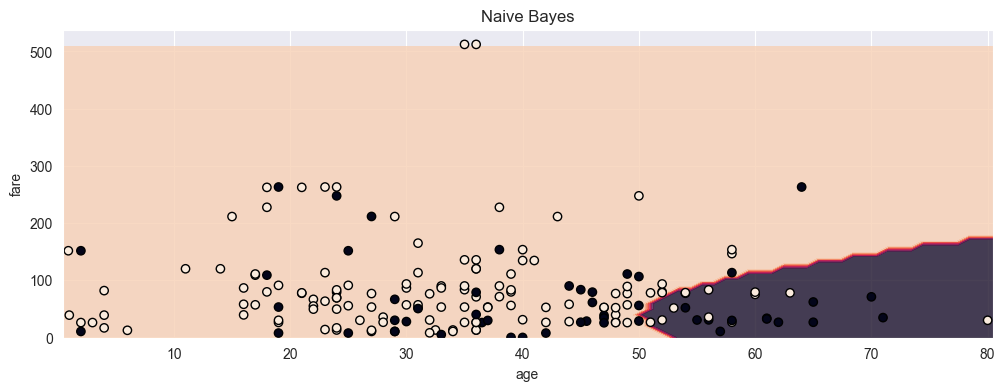

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# create meshgrid of points to plot the decision boundary
x_min, x_max = X["age"].min() - 0.5, X["age"].max() + 0.5
y_min, y_max = X["fare"].min() - 0.5, X["fare"].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 10))
# predictions on the meshgrid points
nb_pred = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
nb_pred = nb_pred.reshape(xx.shape)

plt.figure(figsize=(12, 4))
plt.contourf(xx, yy, nb_pred, alpha = 0.8)
plt.scatter(X["age"], X["fare"], c = y, edgecolors='k')
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Naive Bayes')
plt.show()